**TABLE OF CONTENTS**
1. Data Exploration
  
    1.1. Imports

    1.2. Exploring Dataset

    1.3. Variable Analysis
2. Data Cleaning

    2.1.Missing Data

    2.2.Duplicate Data

    2.3.Detection of Outliers – IQR approach
3. Feature Engineering

    4.1 Correlation Analysis

    4.2. Feature Encoding
4. Model Training
5. Model Evaluation and Tuning(Hyper-parameter tuning(HPs-T))

Bonus: Feature importance evaluation



#####**VARIABLES:**
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

##1. EXPLORATORY DATA ANALYSIS(EDA)

####1.1. Imports

In [76]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
from datetime import datetime as dt

# modelling libraries
!pip install xgboost
!pip install lightgbm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import  XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
# ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore', category=DeprecationWarning)
filterwarnings('ignore', category=FutureWarning)

In [78]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.max_rows', None)

In [79]:
df = pd.read_csv('/content/marketing_campaign.csv', sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


####1.2.Exploring Dataset

In [80]:
df.shape

(2240, 29)

In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [83]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [84]:
# Z_CostContact and Z_Revenue variables don't carry information so we can drop these
df.drop('Z_CostContact', inplace=True, axis=1)
df.drop('Z_Revenue', inplace=True, axis=1)

In [85]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [86]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1


In [87]:
# to check data balance
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

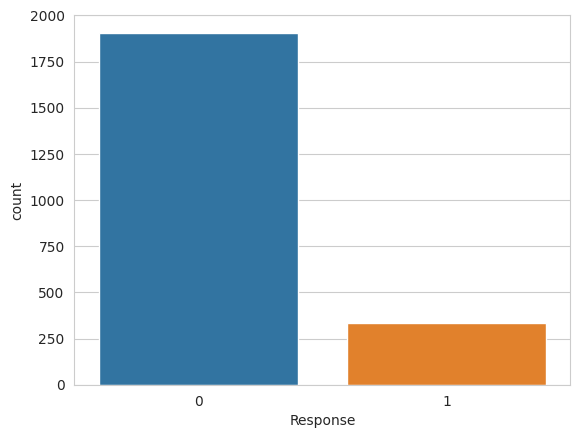

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Response',data=df);

In [14]:
# There is imbalanced distribution
# Imblance class : Moderate (%1-%20)
(df[(df.Response == 1)].count()[0]/df[(df.Response == 0)].count()[0])*100

17.523609653725078

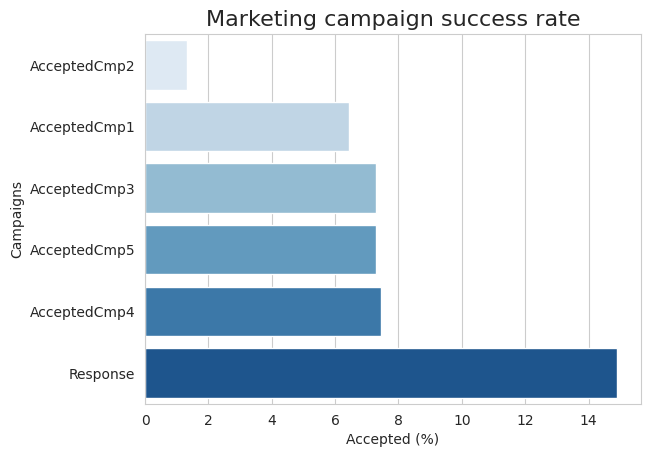

In [15]:
# to calculate success rate for each campaign
campaign_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=campaign_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaigns')
plt.title('Marketing campaign success rate', size=16);

In [16]:
df['Education'].value_counts().to_frame('Count')

,Count
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


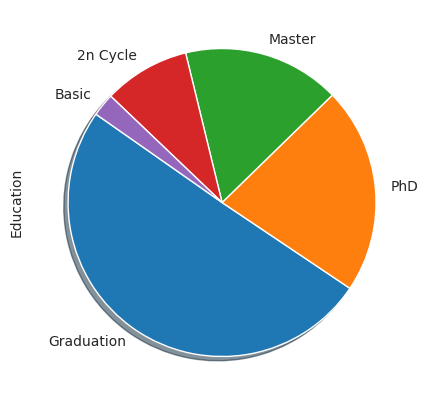

In [17]:
# Visualizing the distribution of 'Education' variable in the dataset

df['Education'].value_counts().plot.pie(subplots=True, shadow = True, figsize=(5, 5), startangle=145);

In [18]:
# to check the distribution of response by education variable
df[['Education','Response']].groupby('Education').agg({'Response':'value_counts'})

Response
Education  Response          
2n Cycle   0              181
           1               22
Basic      0               52
           1                2
Graduation 0              975
           1              152
Master     0              313
           1               57
PhD        0              385
           1              101

In [19]:
df[['Education','Response']].groupby('Education').agg({'Response':'mean'}).round(2)

,Response
Education,
2n Cycle,0.11
Basic,0.04
Graduation,0.13
Master,0.15
PhD,0.21


In [20]:
# Let's take a look at the income change by education level
df[['Education','Income']].groupby('Education').agg({'Income':'mean'}).round(2)

,Income
Education,
2n Cycle,47633.19
Basic,20306.26
Graduation,52720.37
Master,52917.53
PhD,56145.31


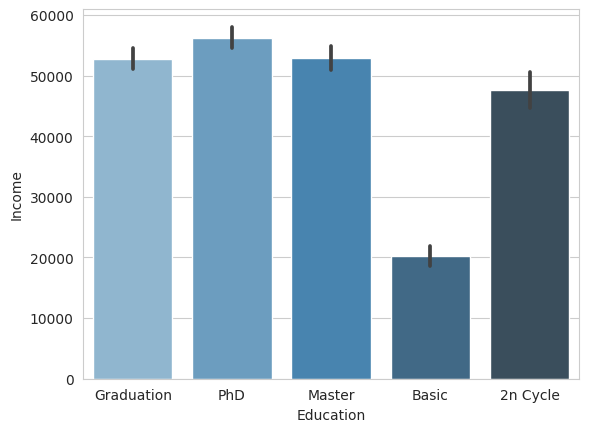

In [21]:
sns.barplot(x=df['Education'], y=df['Income'], data=df,  palette="Blues_d");

####1.3.Variable Analysis

In [22]:
# to find data types of columns
def grab_col_types(dataframe):
  """
  Returns the type of variables in the dataset
  """
  # to find obvious categorical variables
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

  # to find numerical but categorical variables
  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
  cat_cols = cat_cols + num_but_cat

  # to find categorical but cardinal variables
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f'Total Variables: {len(df.columns)}\n'
        f'Categorical columns: {len(cat_cols)}\n'
        f'Numerical columns: {len(num_cols)}\n'
        f'Categorical but cardinal columns: {len(cat_but_car)}\n'
        f'Numerical but categorical columns: {len(num_but_cat)}')

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [23]:
cat_cols, num_cols, cat_but_car_cols, num_but_cat = grab_col_types(df)

Total Variables: 27
Categorical columns: 11
Numerical columns: 15
Categorical but cardinal columns: 1
Numerical but categorical columns: 9


In [24]:
cat_but_car_cols

['Dt_Customer']

In [25]:
num_but_cat

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

NOTES:

We've learned more about the data types of columns.

[1] Dt_Customer column looks like categorical columns but it is not.

[2] 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain' and
 'Response' columns looks like numeric but they are categorical.

#####Visualization Categorical Variables

In [26]:
# to visualize categorical columns
def cat_var_summary(df, col_name, plot=False):
  print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

  if plot:
    plt.figure()
    plt.title(col_name + ' Distribution')
    sns.barplot(x=df[col_name], y=df['Response'], data = df)
    plt.show(block=True)

            Education  Ratio
Graduation       1127  50.31
PhD               486  21.70
Master            370  16.52
2n Cycle          203   9.06
Basic              54   2.41


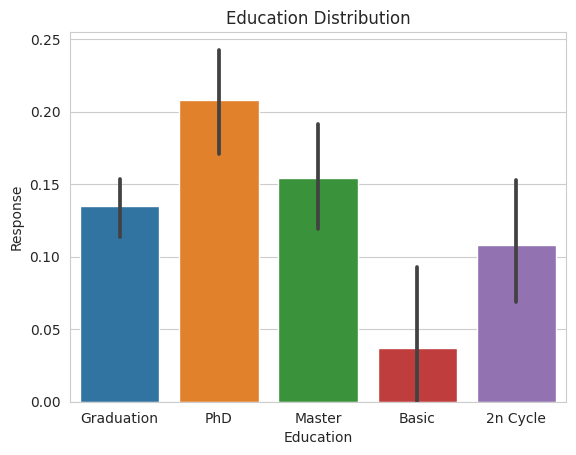

          Marital_Status  Ratio
Married              864  38.57
Together             580  25.89
Single               480  21.43
Divorced             232  10.36
Widow                 77   3.44
Alone                  3   0.13
Absurd                 2   0.09
YOLO                   2   0.09


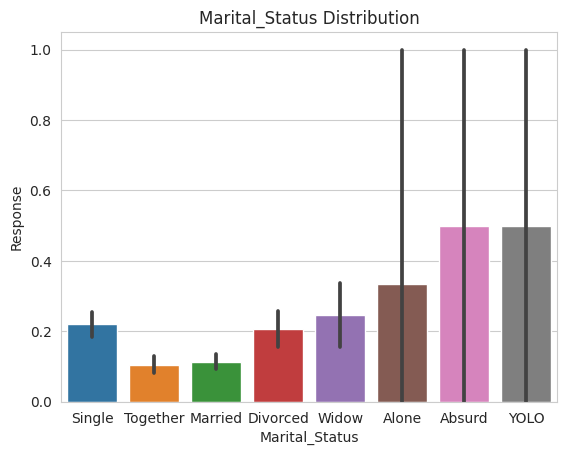

   Kidhome  Ratio
0     1293  57.72
1      899  40.13
2       48   2.14


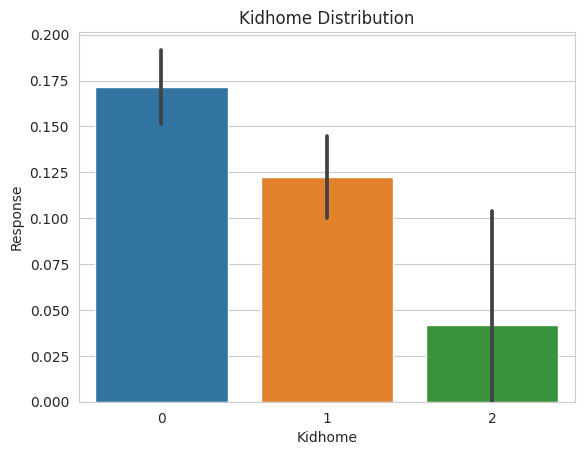

   Teenhome  Ratio
0      1158  51.70
1      1030  45.98
2        52   2.32


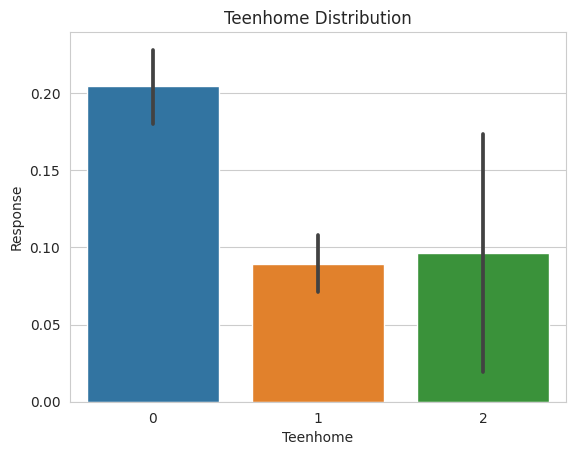

   AcceptedCmp3  Ratio
0          2077  92.72
1           163   7.28


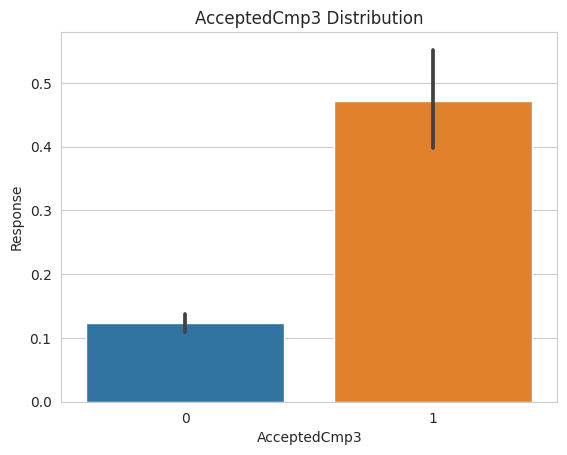

   AcceptedCmp4  Ratio
0          2073  92.54
1           167   7.46


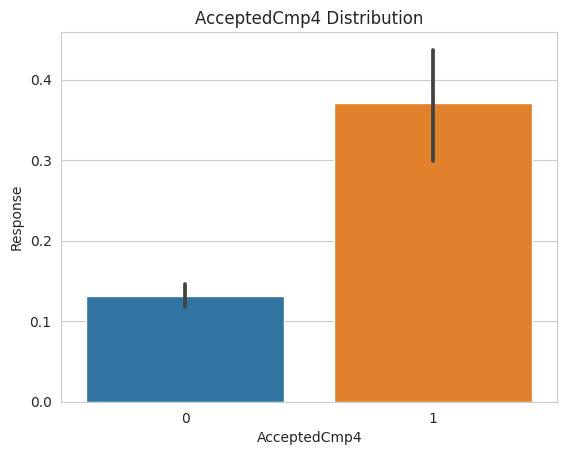

   AcceptedCmp5  Ratio
0          2077  92.72
1           163   7.28


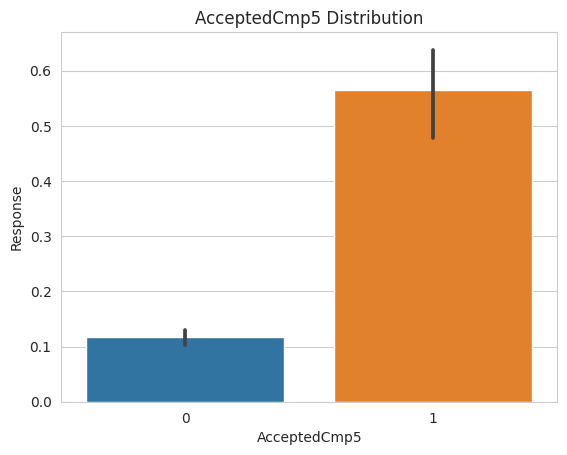

   AcceptedCmp1  Ratio
0          2096  93.57
1           144   6.43


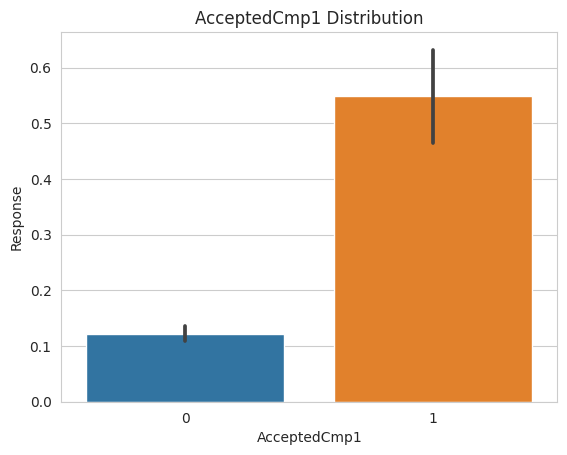

   AcceptedCmp2  Ratio
0          2210  98.66
1            30   1.34


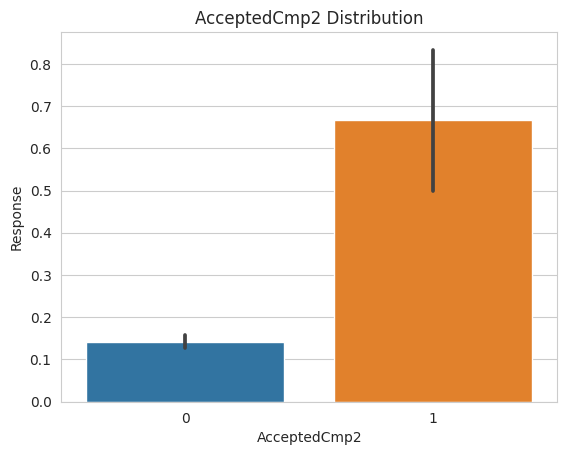

   Complain  Ratio
0      2219  99.06
1        21   0.94


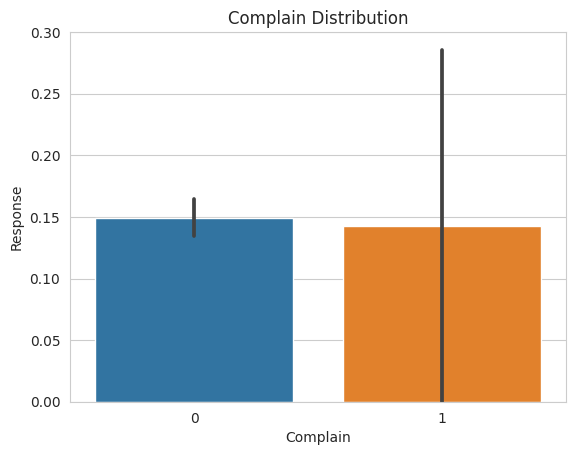

   Response  Ratio
0      1906  85.09
1       334  14.91


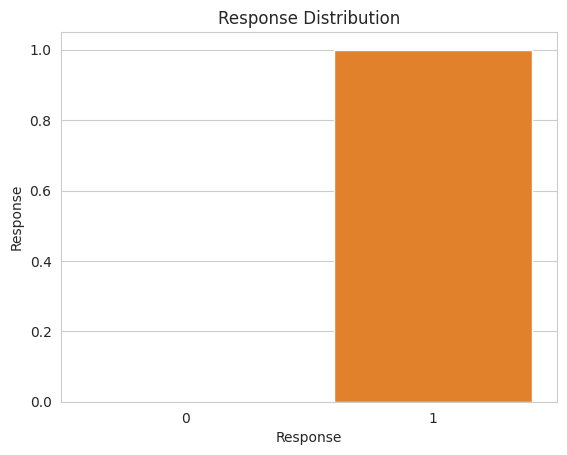

In [27]:
# Let's visualize our categorical columns excluding booleans!
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(f'{col} variable is boolean type!')
    else:
        cat_var_summary(df, col, plot=True)

#####Visualization Numerical Variables

In [28]:
# to visualize numerical columns
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.15, 0.35, 0.50, 0.65, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    2240.00
mean     5592.16
std      3246.66
min         0.00
5%        576.85
15%      1661.80
35%      3920.30
50%      5458.50
65%      7186.35
80%      9059.20
90%     10203.40
95%     10675.05
99%     11074.61
max     11191.00
Name: ID, dtype: float64


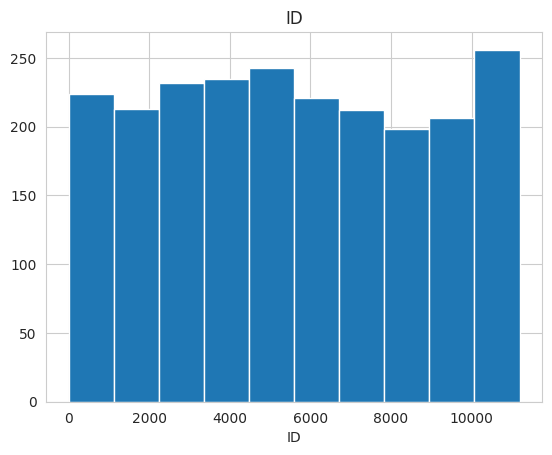

count   2240.00
mean    1968.81
std       11.98
min     1893.00
5%      1950.00
15%     1955.00
35%     1964.00
50%     1970.00
65%     1974.00
80%     1979.00
90%     1984.00
95%     1988.00
99%     1992.00
max     1996.00
Name: Year_Birth, dtype: float64


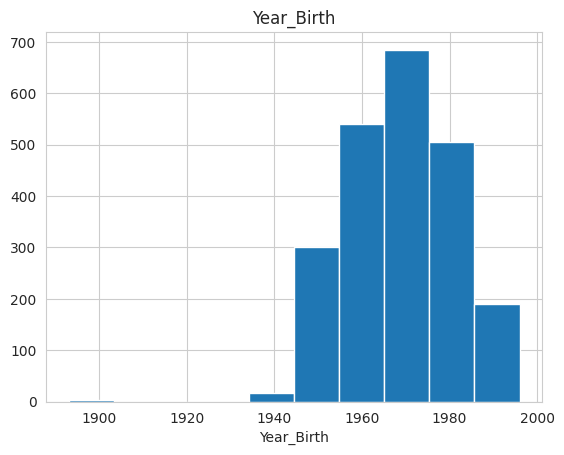

count     2216.00
mean     52247.25
std      25173.08
min       1730.00
5%       18985.50
15%      28427.00
35%      41417.50
50%      51381.50
65%      62060.25
80%      71819.00
90%      79844.00
95%      84130.00
99%      94458.80
max     666666.00
Name: Income, dtype: float64


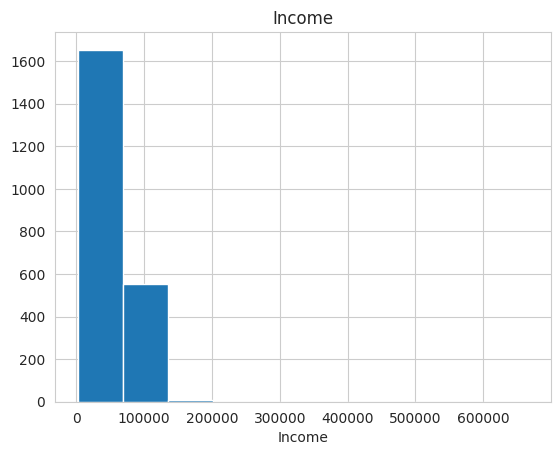

count   2240.00
mean      49.11
std       28.96
min        0.00
5%         4.00
15%       13.85
35%       34.00
50%       49.00
65%       64.00
80%       79.00
90%       89.00
95%       94.00
99%       98.00
max       99.00
Name: Recency, dtype: float64


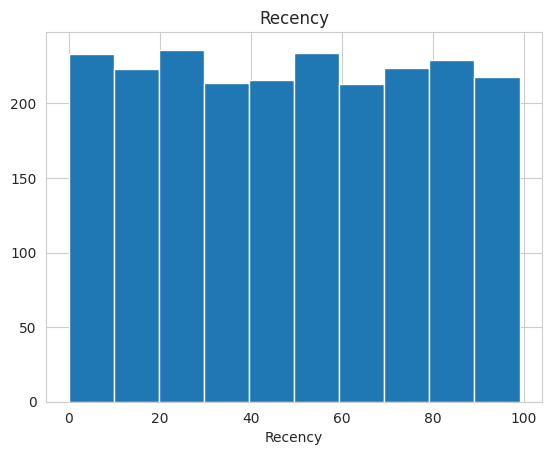

count   2240.00
mean     303.94
std      336.60
min        0.00
5%         3.00
15%       10.85
35%       53.00
50%      173.50
65%      356.35
80%      581.20
90%      822.10
95%     1000.00
99%     1285.00
max     1493.00
Name: MntWines, dtype: float64


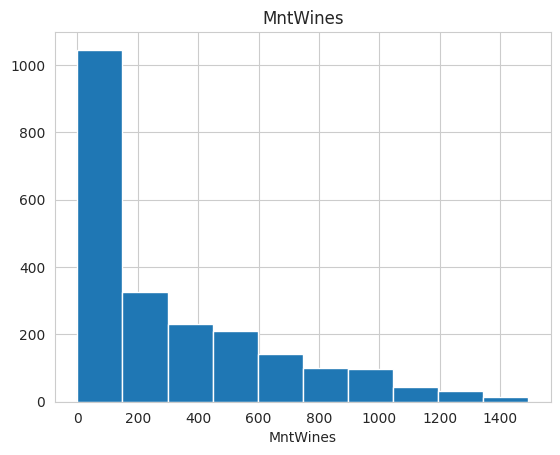

count   2240.00
mean      26.30
std       39.77
min        0.00
5%         0.00
15%        0.00
35%        3.00
50%        8.00
65%       19.00
80%       44.00
90%       83.00
95%      123.00
99%      172.00
max      199.00
Name: MntFruits, dtype: float64


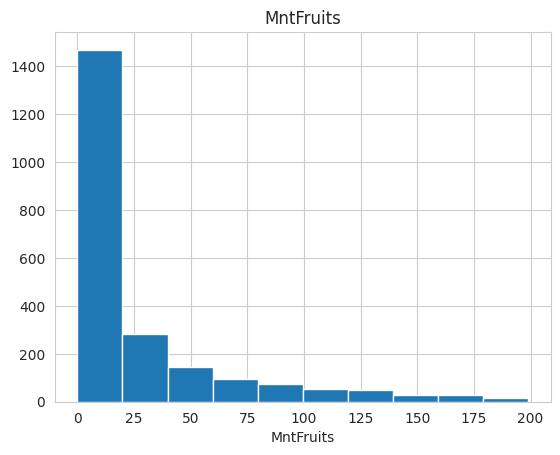

count   2240.00
mean     166.95
std      225.72
min        0.00
5%         4.00
15%        9.00
35%       26.00
50%       67.00
65%      135.00
80%      298.40
90%      499.00
95%      687.10
99%      915.00
max     1725.00
Name: MntMeatProducts, dtype: float64


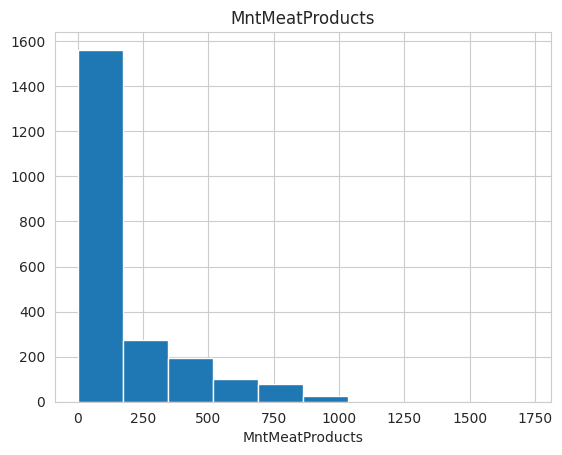

count   2240.00
mean      37.53
std       54.63
min        0.00
5%         0.00
15%        0.00
35%        4.00
50%       12.00
65%       28.00
80%       65.00
90%      120.00
95%      168.05
99%      226.22
max      259.00
Name: MntFishProducts, dtype: float64


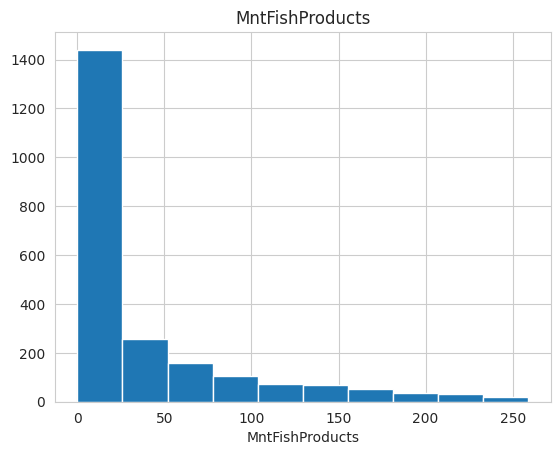

count   2240.00
mean      27.06
std       41.28
min        0.00
5%         0.00
15%        0.00
35%        3.00
50%        8.00
65%       19.00
80%       44.20
90%       89.00
95%      126.00
99%      177.22
max      263.00
Name: MntSweetProducts, dtype: float64


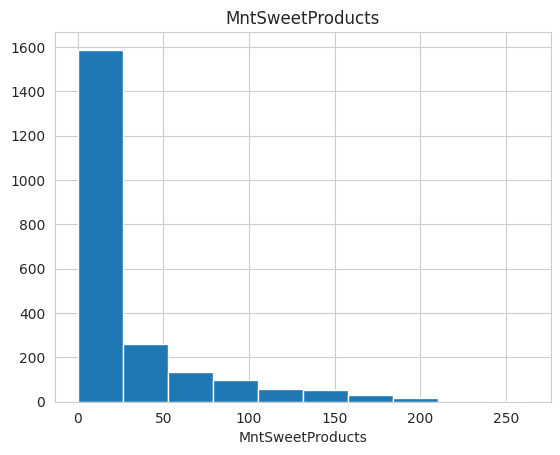

count   2240.00
mean      44.02
std       52.17
min        0.00
5%         1.00
15%        5.00
35%       14.00
50%       24.00
65%       40.00
80%       73.00
90%      122.00
95%      165.05
99%      227.00
max      362.00
Name: MntGoldProds, dtype: float64


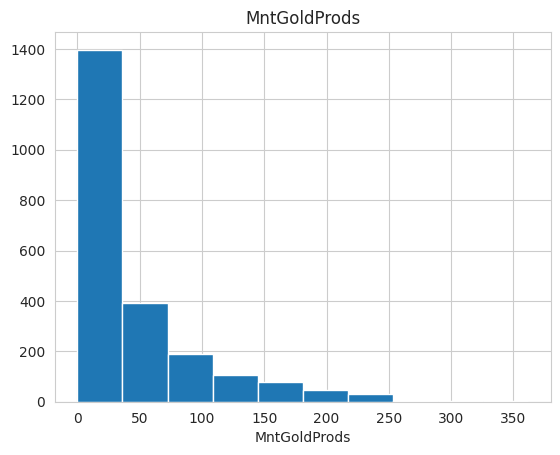

count   2240.00
mean       2.33
std        1.93
min        0.00
5%         1.00
15%        1.00
35%        1.00
50%        2.00
65%        2.00
80%        3.00
90%        5.00
95%        6.00
99%       10.00
max       15.00
Name: NumDealsPurchases, dtype: float64


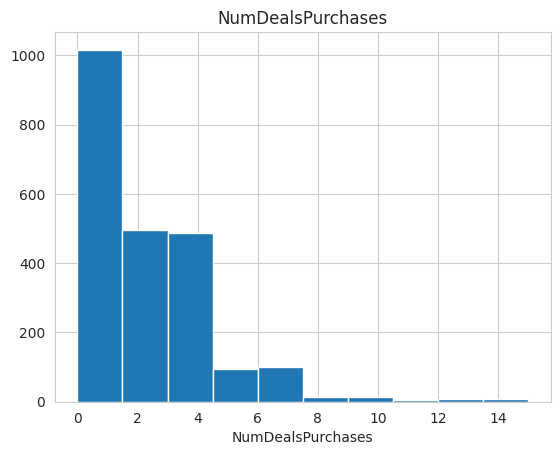

count   2240.00
mean       4.08
std        2.78
min        0.00
5%         1.00
15%        1.00
35%        3.00
50%        4.00
65%        5.00
80%        6.00
90%        8.00
95%        9.00
99%       11.00
max       27.00
Name: NumWebPurchases, dtype: float64


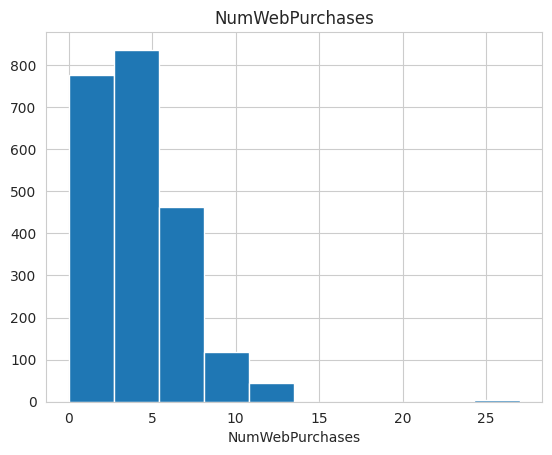

count   2240.00
mean       2.66
std        2.92
min        0.00
5%         0.00
15%        0.00
35%        1.00
50%        2.00
65%        3.00
80%        5.00
90%        7.00
95%        9.00
99%       10.61
max       28.00
Name: NumCatalogPurchases, dtype: float64


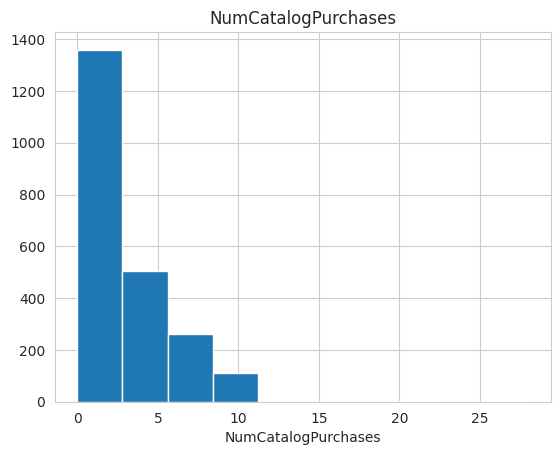

count   2240.00
mean       5.79
std        3.25
min        0.00
5%         2.00
15%        3.00
35%        4.00
50%        5.00
65%        7.00
80%        9.00
90%       11.00
95%       12.00
99%       13.00
max       13.00
Name: NumStorePurchases, dtype: float64


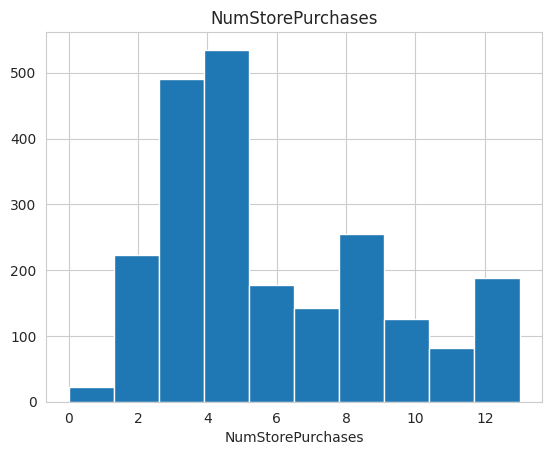

count   2240.00
mean       5.32
std        2.43
min        0.00
5%         1.00
15%        2.00
35%        4.00
50%        6.00
65%        7.00
80%        7.00
90%        8.00
95%        8.00
99%        9.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64


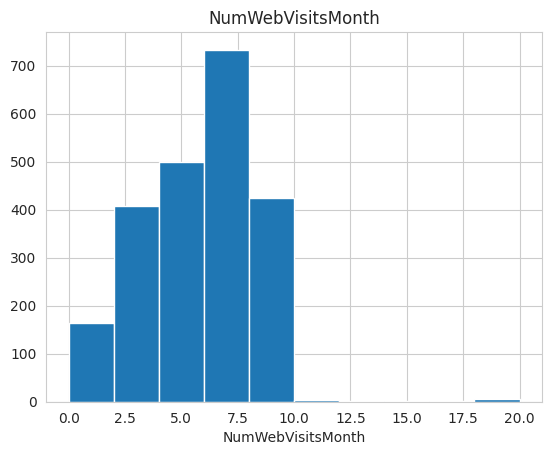

In [29]:
for col in num_cols:
    num_summary(df, col, plot=True)

##2.DATA CLEANING

####Split data

In [30]:
# split data into train and test
X_train, X_test= train_test_split(df, test_size=0.20, random_state=42)

In [32]:
print(X_test.shape)
print(X_train.shape)

(448, 27)
(1792, 27)


####2.1.Missing Data

In [33]:
X_train.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [34]:
X_train[X_train['Income'].isnull() == True].agg({'Education':'value_counts'})

,Education
Graduation,8
Master,4
PhD,4
2n Cycle,3


In [35]:
X_train.groupby('Education')['Income'].mean()

Education
2n Cycle     47387.78
Basic        20359.88
Graduation   52631.37
Master       52243.38
PhD          55558.28
Name: Income, dtype: float64

In [36]:
# to impute by mean income of education category  ?
X_train['Income'].fillna(X_train.groupby('Education')['Income'].transform('mean'), inplace=True)

In [37]:
X_test.groupby('Education')['Income'].mean()

Education
2n Cycle     48529.21
Basic        20096.64
Graduation   53102.12
Master       55138.29
PhD          58594.46
Name: Income, dtype: float64

In [38]:
X_test['Income'].fillna(X_test.groupby('Education')['Income'].transform('mean'), inplace=True)

In [39]:
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())

False
False


####2.2.Duplicate Data

In [40]:
print(X_train.duplicated().sum())
print(X_test.duplicated().sum())

0
0


####2.3.Detection of Outliers – IQR approach

In [41]:
def report(df, col_name):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(14,4)
    fig.suptitle(col_name, fontsize=14)
    sns.histplot(data=df, x=col_name, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col_name, ax=ax[1])
    plt.show()

    print(df[col_name].describe())
    print(f'Skewness  {df[col_name].skew()}')

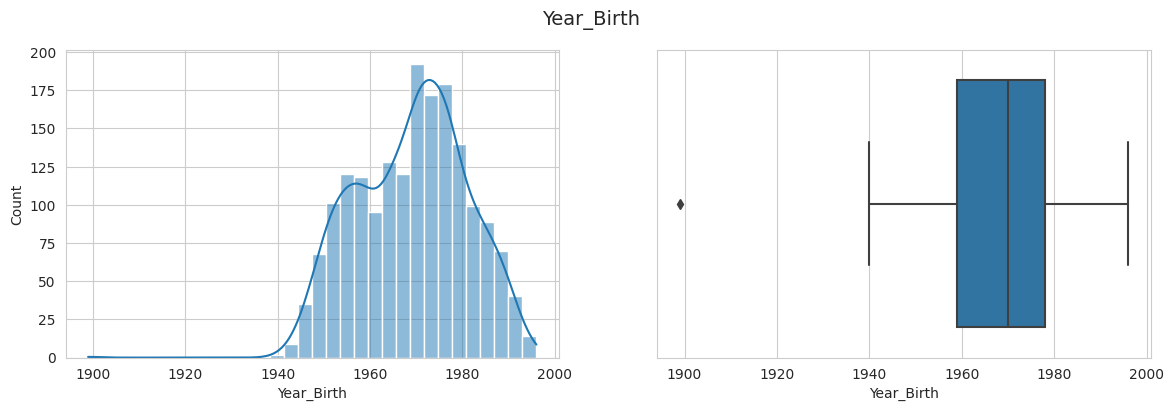

count   1792.00
mean    1968.96
std       11.88
min     1899.00
25%     1959.00
50%     1970.00
75%     1978.00
max     1996.00
Name: Year_Birth, dtype: float64
Skewness  -0.20000435261185465


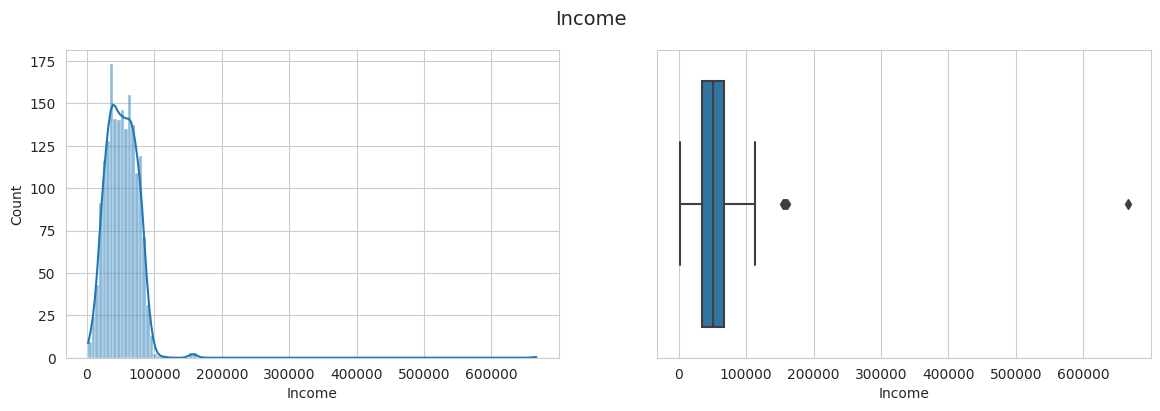

count     1792.00
mean     51967.59
std      26014.94
min       1730.00
25%      35125.50
50%      51144.50
75%      67817.25
max     666666.00
Name: Income, dtype: float64
Skewness  7.557699307667873


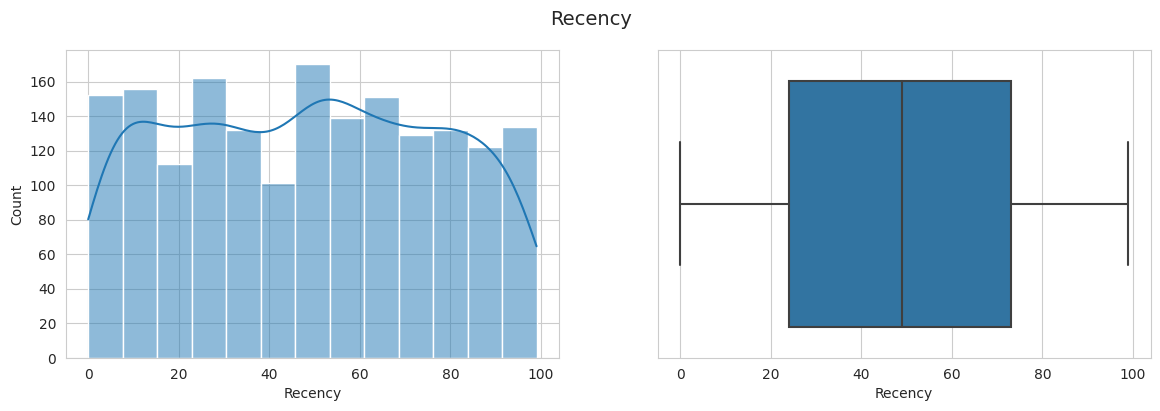

count   1792.00
mean      48.43
std       28.70
min        0.00
25%       24.00
50%       49.00
75%       73.00
max       99.00
Name: Recency, dtype: float64
Skewness  0.010755617752651752


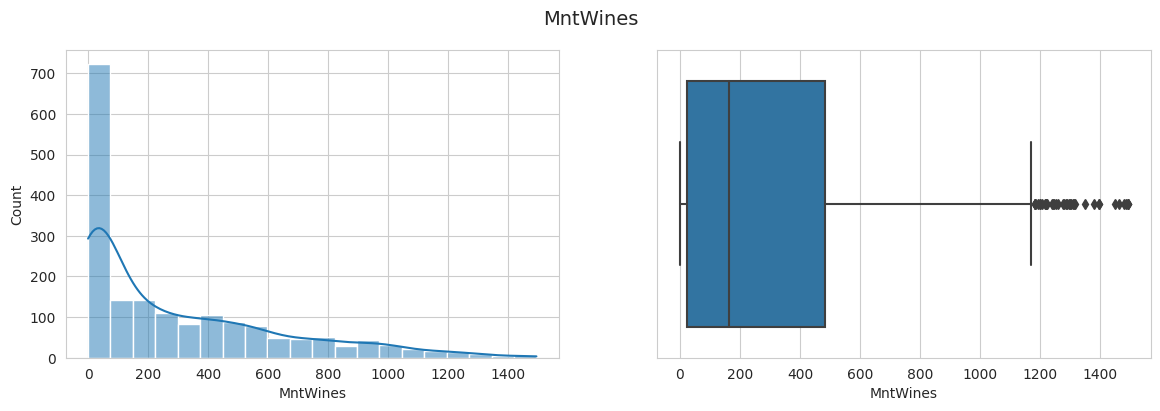

count   1792.00
mean     295.08
std      334.55
min        0.00
25%       23.00
50%      162.50
75%      483.00
max     1493.00
Name: MntWines, dtype: float64
Skewness  1.233436198343044


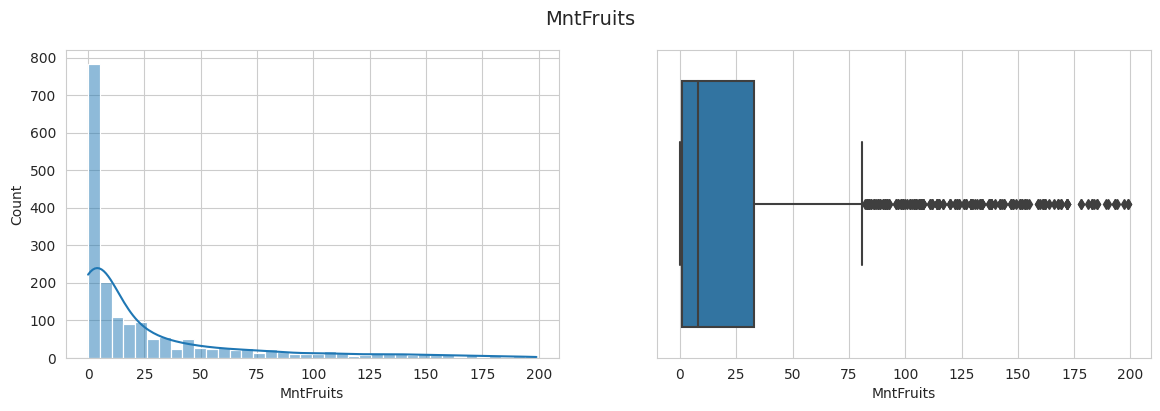

count   1792.00
mean      26.57
std       40.37
min        0.00
25%        1.00
50%        8.00
75%       33.00
max      199.00
Name: MntFruits, dtype: float64
Skewness  2.0835533301675975


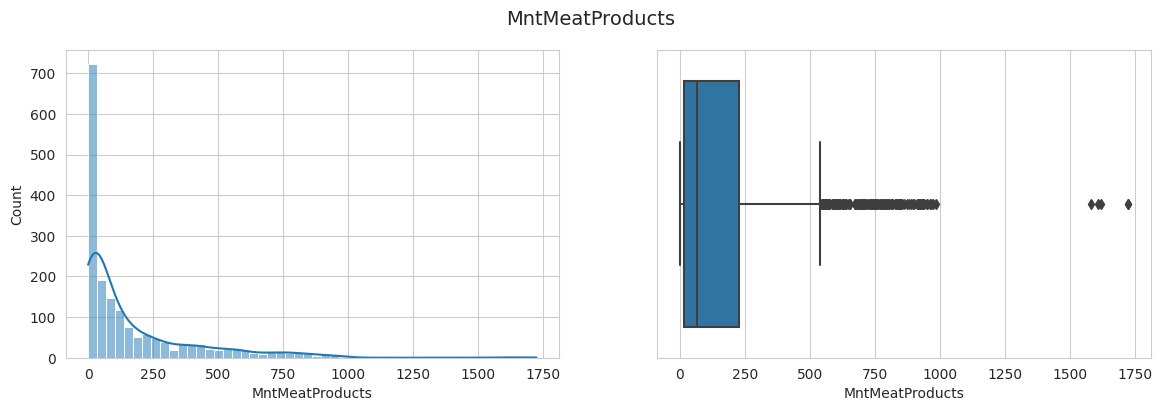

count   1792.00
mean     167.19
std      229.85
min        0.00
25%       15.00
50%       65.50
75%      226.50
max     1725.00
Name: MntMeatProducts, dtype: float64
Skewness  2.150933871735895


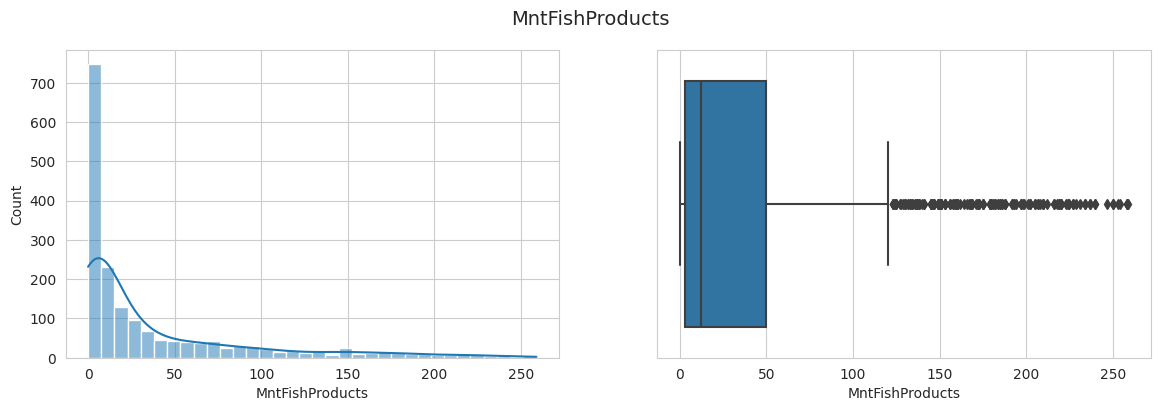

count   1792.00
mean      37.46
std       54.43
min        0.00
25%        3.00
50%       12.00
75%       50.00
max      259.00
Name: MntFishProducts, dtype: float64
Skewness  1.918950741430617


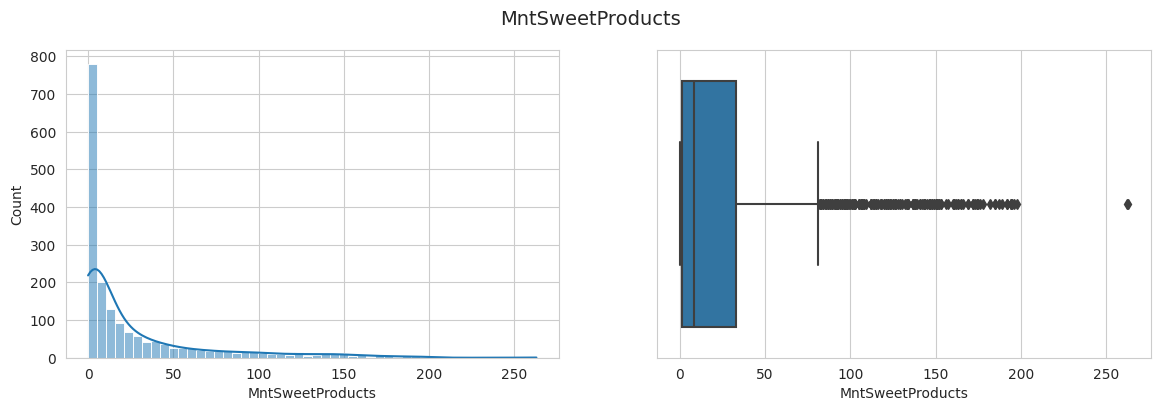

count   1792.00
mean      27.00
std       41.27
min        0.00
25%        1.00
50%        8.00
75%       33.00
max      263.00
Name: MntSweetProducts, dtype: float64
Skewness  2.1345837359845383


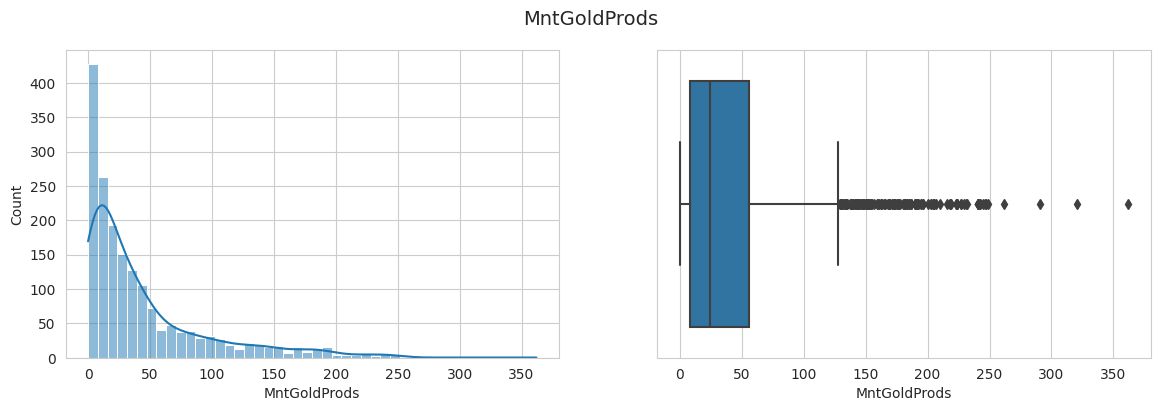

count   1792.00
mean      43.71
std       52.11
min        0.00
25%        8.00
50%       24.00
75%       56.00
max      362.00
Name: MntGoldProds, dtype: float64
Skewness  1.9223197116423978


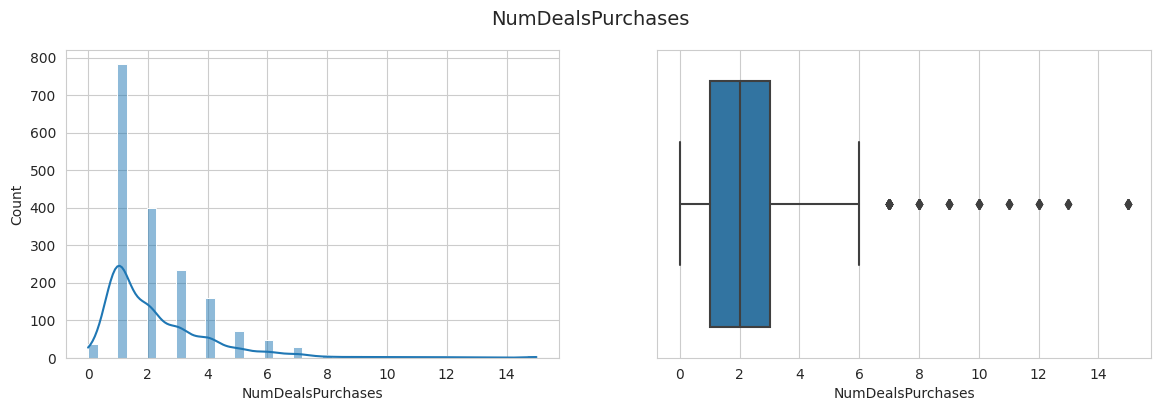

count   1792.00
mean       2.31
std        1.93
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       15.00
Name: NumDealsPurchases, dtype: float64
Skewness  2.548470040083873


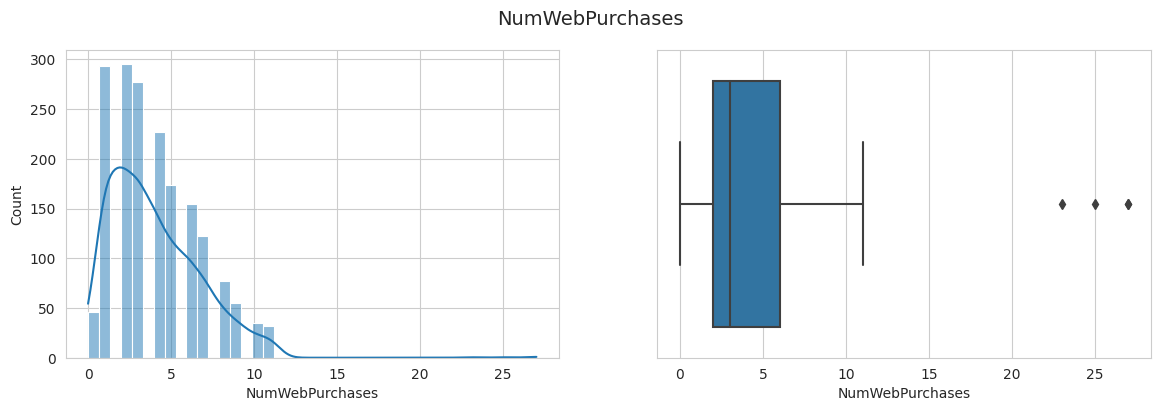

count   1792.00
mean       4.01
std        2.80
min        0.00
25%        2.00
50%        3.00
75%        6.00
max       27.00
Name: NumWebPurchases, dtype: float64
Skewness  1.5693581867391042


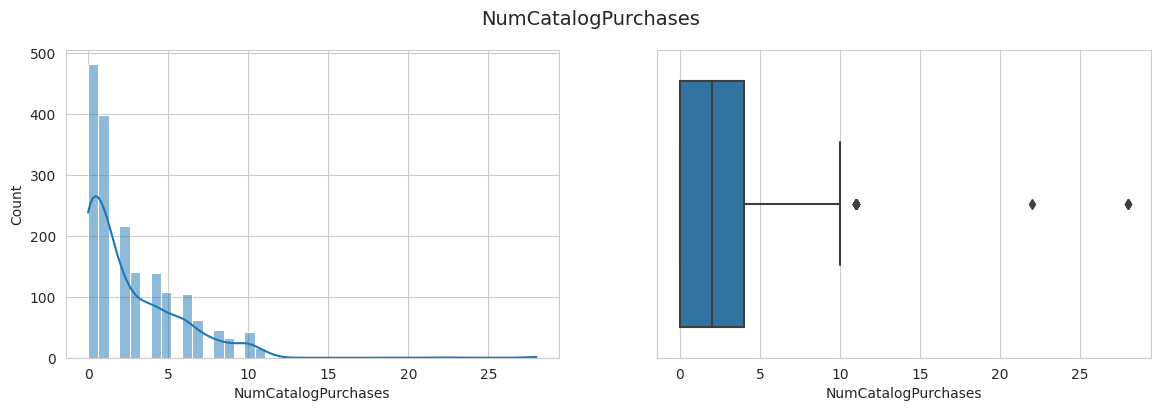

count   1792.00
mean       2.66
std        3.00
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       28.00
Name: NumCatalogPurchases, dtype: float64
Skewness  2.011611501197344


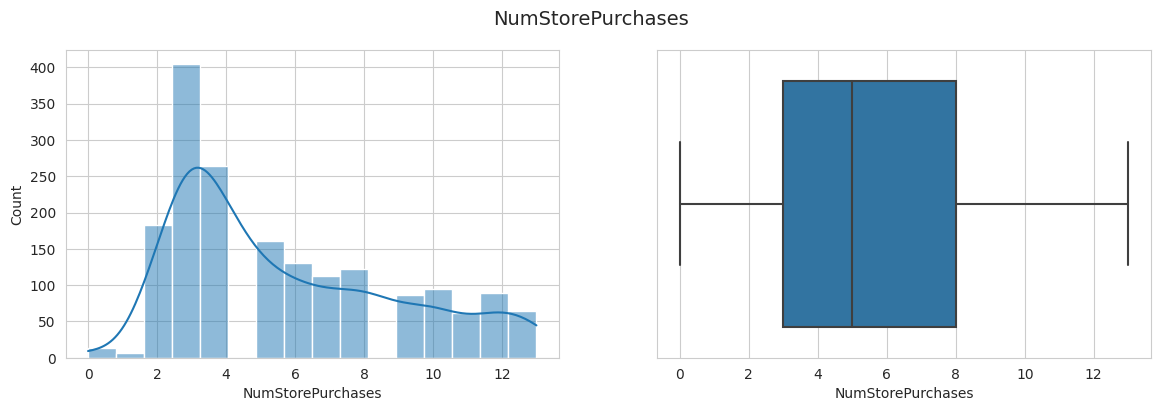

count   1792.00
mean       5.74
std        3.26
min        0.00
25%        3.00
50%        5.00
75%        8.00
max       13.00
Name: NumStorePurchases, dtype: float64
Skewness  0.7163257734016655


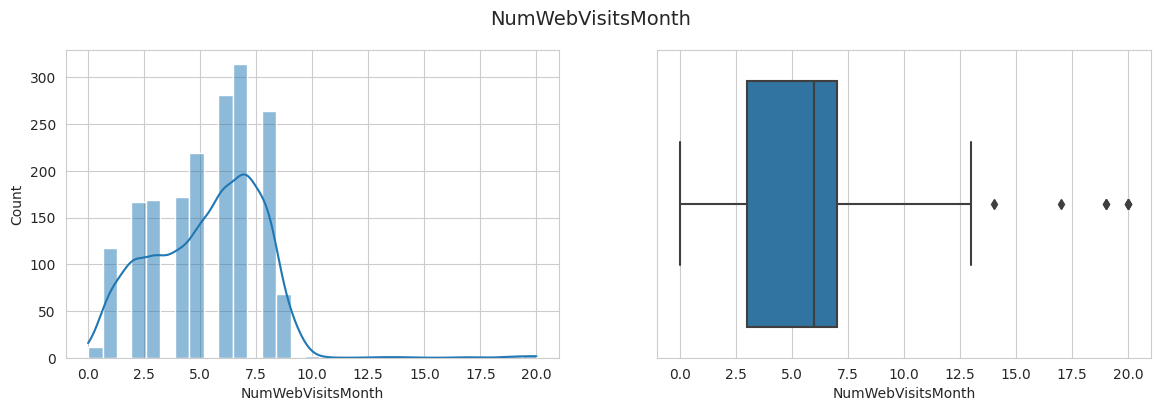

count   1792.00
mean       5.31
std        2.45
min        0.00
25%        3.00
50%        6.00
75%        7.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64
Skewness  0.31438498475024057


In [42]:
for col in num_cols:
    if col == 'ID': 
      continue
    else:
      report(X_train, col)

In [43]:
def grab_outliers(dataframe, col_name):
  df_col_name = dataframe[col_name]

  # to define upper and lower outlier boundaries by third and first quartiles
  Q1 = df_col_name.quantile(0.25)
  Q3 = df_col_name.quantile(0.75)
  IQR = Q3-Q1 
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  outliers = (df_col_name < lower_bound) | (df_col_name > upper_bound) 
  outliers_index = df_col_name[outliers].index

  print(f"{col_name} variable\n"
        f"Outliers boundaries: {lower_bound}, {upper_bound}\n"
        f"Number of outliers : {len(outliers_index)}")

  return col_name, lower_bound, upper_bound, outliers_index

In [44]:
def capping_outliers(df, col_name, outliers_index, bound):
  df[col_name][outliers_index] = bound
  return df

In [45]:
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

#####Year_Birth variable

In [46]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_train, 'Year_Birth')

Year_Birth variable
Outliers boundaries: 1930.5, 2006.5
Number of outliers : 1


In [47]:
X_train.loc[outliers_index,:]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
339,1150,1899,PhD,Together,83532.00,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [48]:
# There is just one outlier in the variable year_birth, these could be data entry errors. 
# Therefore, these were excluded from the analysis.
X_train.drop(index=(outliers_index), inplace=True)

In [49]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_test, 'Year_Birth')

Year_Birth variable
Outliers boundaries: 1932.0, 2004.0
Number of outliers : 2


In [50]:
X_test.drop(index=(outliers_index), inplace=True)

#####Income variable outliers detection

In [51]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_train, 'Income')

Income variable
Outliers boundaries: -13944.0, 116768.0
Number of outliers : 7


In [52]:
X_train[X_train.Income < 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [53]:
# The column has a right-skewed distribution, so the outliers are replaced by the upper bound
X_train = capping_outliers(X_train, 'Income', outliers_index, upper_bound)

<ipython-input-44-e46843775cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][outliers_index] = bound


In [54]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_test, 'Income')

Income variable
Outliers boundaries: -11630.5, 118205.5
Number of outliers : 1


In [55]:
X_test = capping_outliers(X_test, 'Income', outliers_index, upper_bound)

<ipython-input-44-e46843775cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][outliers_index] = bound


##3.FEATURE ENGINEERING

####3.1 Correlation Analysis

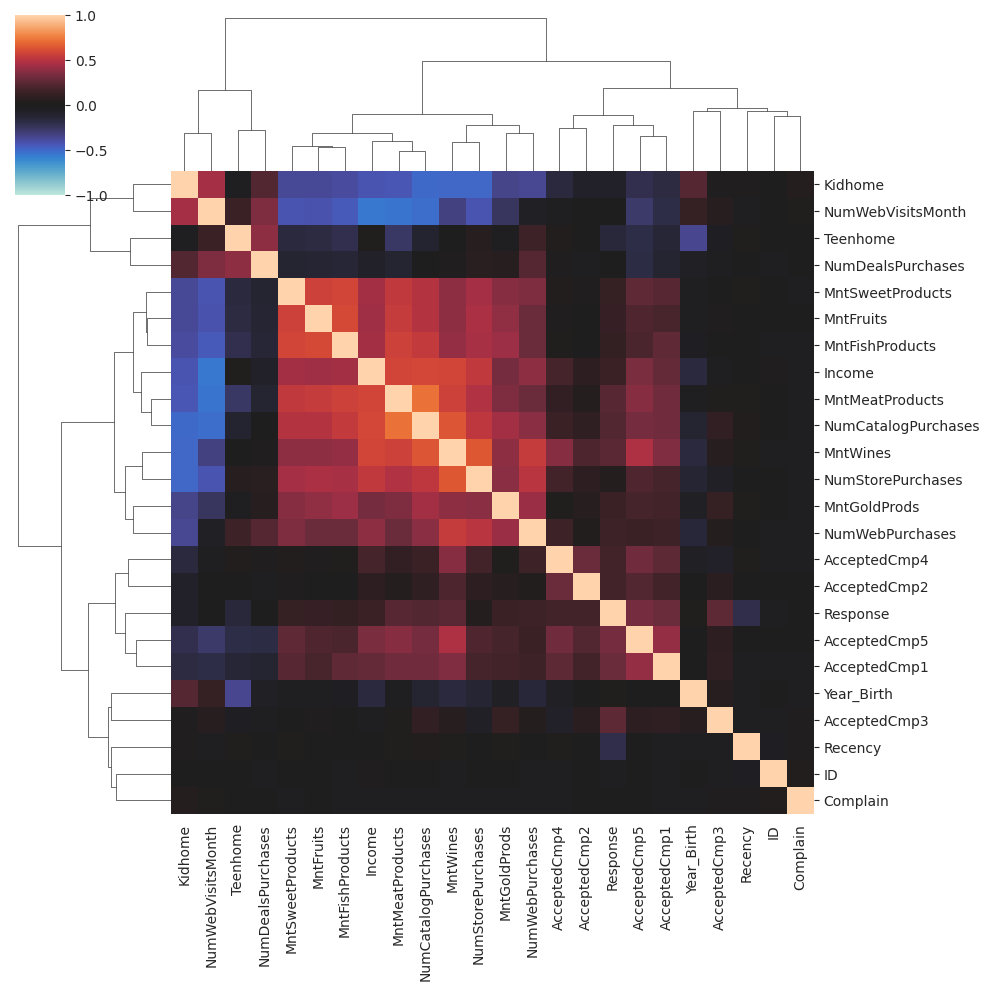

In [56]:
sns.clustermap(
        df.corr(),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete"
    );

NOTE : No highly correlated variables with each other

### 3.2. Feature Encoding

In [57]:
# to visualize categorical columns
def cat_val_graph(df, col_name):
  plt.figure(figsize = (8, 6))
  sns.countplot(x = df[col_name], palette = 'rocket_r')

##### Education

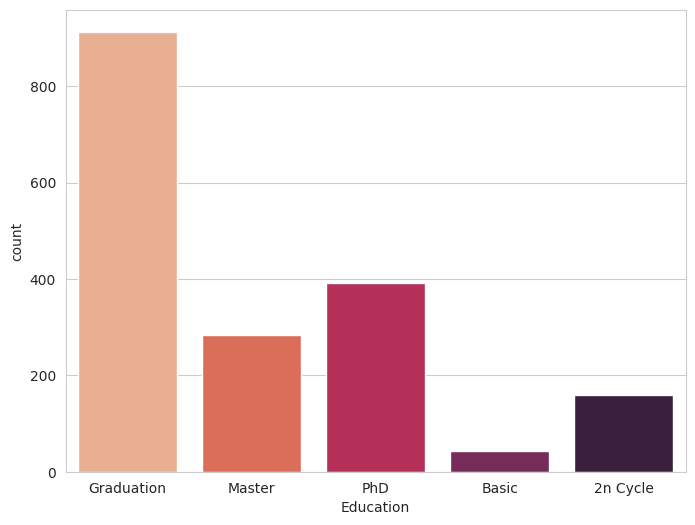

In [58]:
cat_val_graph(X_train, 'Education')

In [59]:
#Education levels are divided into three groups
X_train["Education"] = X_train["Education"].replace({'Basic':'Undergraduate', 
                                                     '2n Cycle':'Undergraduate', 
                                                     'Graduation':'Graduate', 
                                                     'Master' :'Postgraduate', 
                                                     'PhD' :'Postgraduate'})

X_test["Education"] = X_test["Education"].replace({'Basic':'Undergraduate', 
                                                   '2n Cycle':'Undergraduate', 
                                                   'Graduation':'Graduate', 
                                                   'Master' :'Postgraduate', 
                                                   'PhD' :'Postgraduate'})

In [60]:
# new distribution
X_train["Education"].value_counts()

Graduate         913
Postgraduate     675
Undergraduate    203
Name: Education, dtype: int64

In [61]:
# Does the test data contain data from all new categories? Checking before doing one-hot-encoding
X_test["Education"].value_counts()

Graduate         214
Postgraduate     180
Undergraduate     52
Name: Education, dtype: int64

In [62]:
# to do one-hot-encoding
# don't forget, 'one-hot-encoding' automatically drop the original variable columns
X_train = pd.get_dummies(X_train, columns = ["Education"], prefix = ["Education"])
X_test = pd.get_dummies(X_test, columns = ["Education"], prefix = ["Education"])

#####'Marital Status'

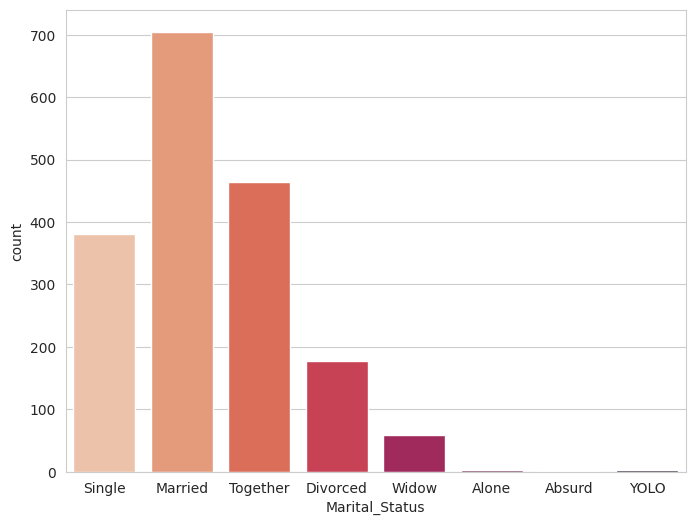

In [63]:
cat_val_graph(X_train, 'Marital_Status')

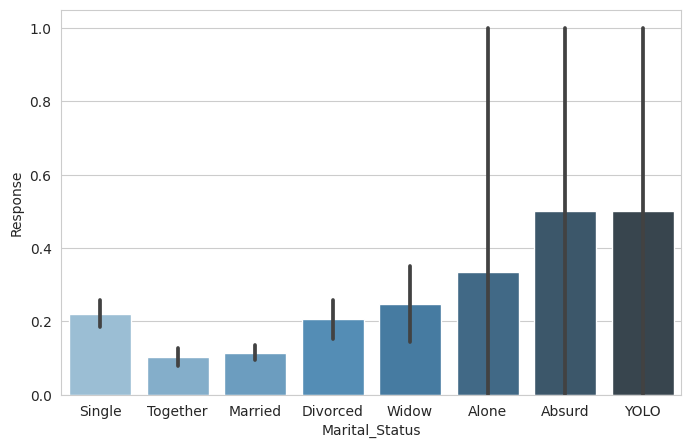

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Marital_Status'], y=df['Response'], data=df,  palette="Blues_d");

In [65]:
# There are too many category for 'Marital Status'
# Categories are divided into two groups representing married and single status
# Married and Together are represent by 1, Single, Divorced, Widow, Alone, Absurd and YOLO represent by 0
X_train['NewMaritalStatus'] = np.where((X_train['Marital_Status']=='Together')|(X_train['Marital_Status']=='Married'), 1, 0)
X_test['NewMaritalStatus'] = np.where((X_test['Marital_Status']=='Together')|(X_test['Marital_Status']=='Married'), 1, 0)

In [66]:
# to check
X_train[['NewMaritalStatus','Marital_Status']].head()

,NewMaritalStatus,Marital_Status
792,0,Single
1271,0,Single
1538,1,Married
668,1,Married
1975,1,Married


#####Age

In [67]:
X_train['Age'] = 2022 - X_train['Year_Birth']
X_test['Age'] = 2022 - X_test['Year_Birth']
X_train['Age'].head()

792     72
1271    59
1538    51
668     54
1975    53
Name: Age, dtype: int64

#####Dt_Customer variable convert to month scale

In [68]:
# Dt_Customer
X_train['Dt_Customer'].head()

792     2013-07-19
1271    2013-01-22
1538    2012-10-16
668     2013-05-09
1975    2013-10-05
Name: Dt_Customer, dtype: object

In [69]:
# creating Year, Month columns for further analysis

# convert the 'Date' column to datetime format
X_train['Dt_Customer']= pd.to_datetime(X_train['Dt_Customer'])
X_test['Dt_Customer']= pd.to_datetime(X_test['Dt_Customer'])

# to create Year and Month columns
X_train['Year'] = X_train["Dt_Customer"].dt.year
X_train['Month'] = X_train["Dt_Customer"].dt.month

X_test['Year'] = X_test["Dt_Customer"].dt.year
X_test['Month'] = X_test["Dt_Customer"].dt.month

In [70]:
# to check
X_train[['Year', 'Month']].head()

,Year,Month
792,2013,7
1271,2013,1
1538,2012,10
668,2013,5
1975,2013,10


In [71]:
# to drop all unnecessary columns
drop_columns = ['Marital_Status','Year_Birth','Dt_Customer']
X_train.drop(drop_columns, axis=1, inplace=True)
X_test.drop(drop_columns, axis=1, inplace=True)

### 3.3. Feature Selection

####Feature Importance

In [72]:
print(X_train['ID'].nunique())
print(X_test['ID'].nunique())

1791
446


In [73]:
# Every ID represents just one row so no need grouping these
X_train.drop('ID', inplace=True, axis=1)
X_test.drop('ID', inplace=True, axis=1)

In [74]:
y_train = X_train[['Response']]
X_train = X_train.drop('Response', axis = 1)
y_test = X_test[['Response']]
X_test = X_test.drop('Response', axis = 1)

In [75]:
# We'll train a model to identify the importance of features
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

<ipython-input-75-a8d302951805>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train,y_train)


0.8699551569506726


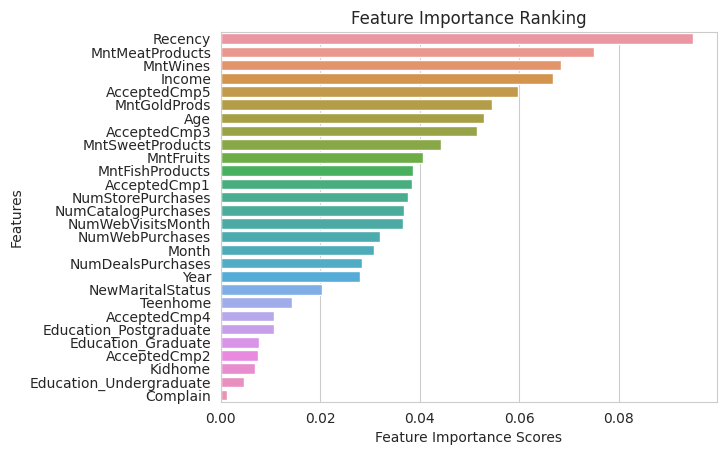

In [88]:
feature_importance = pd.Series(rf_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

NOTES :

By selecting features, we want to create a model that is more generalizable, has a shorter training time, and can predict with higher accuracy.

[1] 'Complain' column is least important columns, so We'll to drop it.

[2] We will try to create more effective columns than those with less important column.

###3.4.Feature Creation and Aggregation

In [89]:
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

In [90]:
# Collecting all expenses column together
X_train['TotalMntSpent'] = sum((X_train['MntWines'], X_train['MntFruits'],
                               X_train['MntMeatProducts'], X_train['MntFishProducts'], 
                               X_train['MntSweetProducts'], X_train['MntGoldProds'])) 

X_test['TotalMntSpent'] = sum((X_test['MntWines'], X_test['MntFruits'],
                               X_test['MntMeatProducts'], X_test['MntFishProducts'], 
                               X_test['MntSweetProducts'], X_test['MntGoldProds']))

In [91]:
# to create a new column with the total family member size
X_train['FamilySize'] = X_train['Teenhome'] + X_train['Kidhome'] + X_train['NewMaritalStatus'] + 1

X_test['FamilySize'] = X_test['Teenhome'] + X_test['Kidhome'] + X_test['NewMaritalStatus'] + 1

In [92]:
X_train[['Teenhome','Kidhome','NewMaritalStatus','Response']].corr()

,Teenhome,Kidhome,NewMaritalStatus,Response
Teenhome,1.00,-0.05,0.02,-0.16
Kidhome,-0.05,1.00,0.03,-0.10
NewMaritalStatus,0.02,0.03,1.00,-0.15
Response,-0.16,-0.10,-0.15,1.00


In [93]:
X_train[['FamilySize', 'Response']].corr()

,FamilySize,Response
FamilySize,1.00,-0.23
Response,-0.23,1.00


In [94]:
# to drop all unnecessary columns
# 'Complain' variable has very little importance according to feature importance analysis so this variable has been dropped
drop_columns=['Complain','MntWines', 'MntFruits', 
              'MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 
              'Kidhome','Teenhome','NewMaritalStatus'
          ]

X_train.drop(drop_columns, inplace=True, axis=1)
X_test.drop(drop_columns, inplace=True, axis=1)

##4. MODEL

In [95]:
y_train = X_train[['Response']]
X_train = X_train.drop('Response', axis = 1)
y_test = X_test[['Response']]
X_test = X_test.drop('Response', axis = 1)

NOTE: We have unbalanced data, but we need balanced data to avoid biasing our model and improve our performance metrics. So we'll use to Smote(Synthetic Minority Oversampling Technique).

In [96]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
df_balanced = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

In [97]:
# Let's take a look at the descriptive statistics of our new data after the SMOTE technique
df_balanced.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Age,Year,Month,TotalMntSpent,FamilySize,Response
count,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00,3052.00
mean,55169.04,42.12,2.14,4.33,3.16,5.74,5.11,0.07,0.06,0.12,0.08,0.01,0.39,0.31,0.07,52.82,2012.80,6.33,770.96,2.26,0.50
std,22216.44,27.44,1.79,2.62,2.98,3.04,2.41,0.25,0.24,0.32,0.27,0.09,0.49,0.46,0.25,11.36,0.69,3.25,680.24,0.95,0.50
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.00,2012.00,1.00,5.00,1.00,0.00
25%,36973.65,18.75,1.00,2.00,1.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.00,2012.00,4.00,104.00,2.00,0.00
50%,55317.14,39.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52.00,2013.00,6.00,603.00,2.00,0.50
75%,73448.50,63.00,3.00,6.00,5.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,62.00,2013.00,9.00,1345.25,3.00,1.00
max,116768.00,99.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,82.00,2014.00,12.00,2525.00,5.00,1.00


In [98]:
algorithms_list = [LogisticRegression, RandomForestClassifier, xgb.XGBClassifier, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier, LGBMClassifier]

result = []
results = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "f1_score"])
models = []
for algorithm in algorithms_list:

    # modelling
    model = algorithm().fit(X_train,y_train)
    models.append(model)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)

    # to calculate metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = 2 *(precision * recall) / (precision + recall)

    result = pd.DataFrame([[model_name, accuracy*100, precision*100, recall*100, f1_score*100]], columns = ["Models", "Accuracy", "Precision", "Recall", "f1_score"])
    results = results.append(result)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-98-e27397bc1dce>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = algorithm().fit(X_train,y_tr

In [99]:
results.sort_values('Accuracy', ascending=False)

,Models,Accuracy,Precision,Recall,f1_score
0,RandomForestClassifier,85.65,53.62,53.62,53.62
0,XGBClassifier,85.20,52.11,53.62,52.86
0,LGBMClassifier,85.20,52.05,55.07,53.52
0,MLPClassifier,82.96,33.33,10.14,15.56
0,DecisionTreeClassifier,82.96,46.15,60.87,52.50
0,LogisticRegression,76.23,34.96,62.32,44.79
0,KNeighborsClassifier,70.63,30.63,71.01,42.79
0,SVC,69.51,24.43,46.38,32.00


##5. MODEL TUNING

####LGBM TUNING

In [100]:
lgbm = LGBMClassifier()

In [101]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],
              "n_estimators":[200,500,100],
              "max_depth":[1,2,35,8]}

In [102]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [103]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 35, 'n_estimators': 500}

In [104]:
# final model
lgbm_tuned = LGBMClassifier(learning_rate=0.1, max_depth=8, n_estimators=500).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.8632286995515696

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       377
           1       0.56      0.58      0.57        69

    accuracy                           0.86       446
   macro avg       0.74      0.75      0.74       446
weighted avg       0.87      0.86      0.86       446



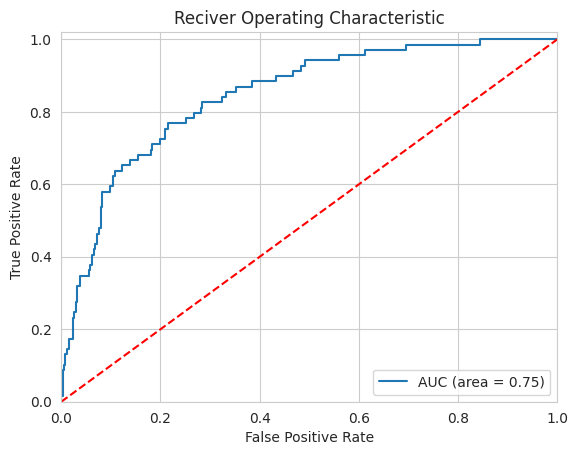

In [106]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####XGBOOST TUNING

In [107]:
xgb = XGBClassifier()

In [108]:
# Typical values selected for XGBoost
xgb_params =  {"learning_rate": [0.1,0.001,0.01],
             "n_estimators": [100,500,800,1000],
             "subsample": [0.6,0.8,1],
              "max_depth": [3,5,7]}

In [109]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [110]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}

In [111]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, max_depth=7, n_estimators=500, subsample=0.8).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.8587443946188341

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       377
           1       0.54      0.59      0.57        69

    accuracy                           0.86       446
   macro avg       0.73      0.75      0.74       446
weighted avg       0.86      0.86      0.86       446



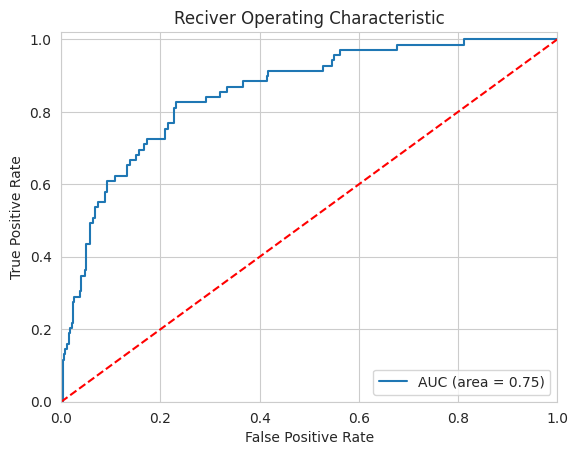

In [113]:
xgb_roc_auc = roc_auc_score(y_test, xgb_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####RANDOM FORESTS TUNING

In [114]:
rf = RandomForestClassifier()

In [115]:
rf_params = {'n_estimators': [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [116]:
rf_cv_model = GridSearchCV(rf,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [117]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 500}

In [118]:
# final model
rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

<ipython-input-118-2793d0887784>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)


0.8452914798206278

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       377
           1       0.50      0.49      0.50        69

    accuracy                           0.85       446
   macro avg       0.70      0.70      0.70       446
weighted avg       0.84      0.85      0.84       446



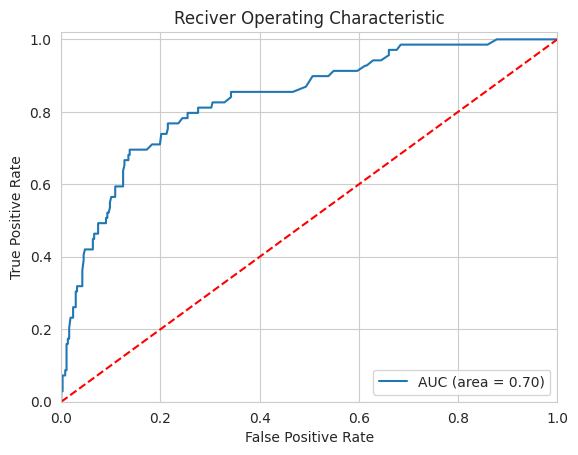

In [120]:
rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

#BONUS

Lastly, we can compare importance of our new features. Finally, we can look at the importance of our new features. We want to have contributed a little to our model with the features created.

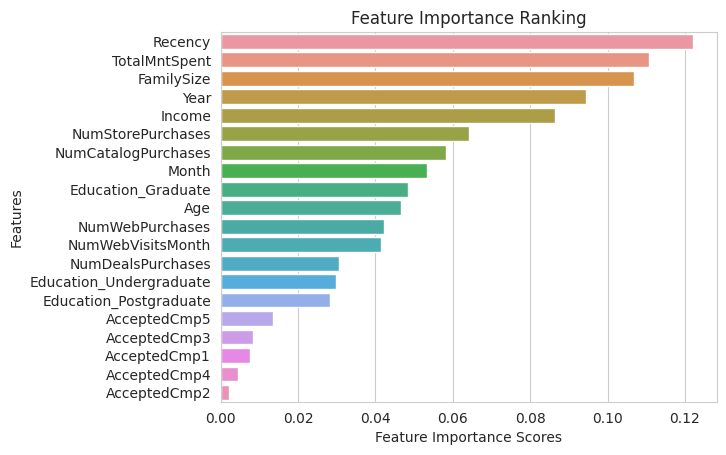

In [121]:
y_pred = rf_tuned.predict(X_test)

feature_importance = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

YES! Our new features are at the top of the list of importance.

#CONCLUSION

We achieve the best result with XGBoost. We don't have big data so we can use XGBoost comfortably, but if we had bigger data we would consider using LightGBM Algorithm to reduce computation time.